Import packages.

In [1]:
import os
import pandas as pd
from utils.plotting import abr_io, abr_threshold, wave1_amplitude, dp_threshold, histology_counts

# ABR

## Load data
First set the data directory and import an example dataset. In this case it is the Sca dataset, but it could also be the CaJ or JRj dataset.

In [2]:
data_file_path_abr = os.path.join(os.getcwd(), "data", "preprocessed", "ABR_Sca_prep.csv")
df_abr = pd.read_csv(data_file_path_abr)

*Changing "ABR_Sca_prep.csv" to "ABR_CaJ_prep.csv" or "ABR_JRj_prep.csv" loads data for a different substrain.*

Our data looks like the following:

In [3]:
df_abr.sample(7)

,file_number,substrain,id,noise_spl,analyzer_id,experimenter_id,noise_type,abr_time,level_db,freq_hz,wave1_amp,threshold,rlm,rlm_error,rlm_error_standardized,standardization_std,is_outlier,confint_low,confint_high
7477,900,Sca,B325_4,103,CV,CV,ZT3,2w,70.0,32000,530.641,30.0,6.165230,0.108856,0.484535,0.224660,False,5.675532,6.561075
4968,627,Sca,B264_3,103,CV,CV,baseline,baseline,70.0,8000,436.116,45.0,6.415575,-0.337667,-2.039781,0.165541,False,6.054742,6.707254
777,66,Sca,B55_1,100,CV,JF,ZT3,24h,85.0,12000,3168.291,60.0,8.018799,0.042148,0.173919,0.242343,False,7.490558,8.445801
4352,400,Sca,B352_2,105,CV,CV,ZT3,2w,55.0,12000,220.054,30.0,5.617678,-0.223805,-0.730142,0.306523,False,4.949542,6.157763
6474,782,Sca,B265_4,103,CV,CV,ZT3,24h,75.0,12000,573.772,50.0,6.406134,-0.053902,-0.313880,0.171727,False,6.031816,6.708712
1716,134,Sca,B354_4,105,CV,CV,baseline,baseline,60.0,32000,811.299,15.0,6.395464,0.303173,1.620966,0.187032,False,5.987785,6.725009
6406,766,Sca,B260_4,103,CV,CV,ZT3,24h,90.0,32000,301.158,75.0,5.733040,-0.025405,-0.640585,0.039658,False,5.646595,5.802916


## Input-output
Below is an example of the input-output relation for each frequency for each time of the ABR (baseline, 24 hours, 2 weeks) for a single subject. This view also shows the result of outlier detection.

The function shows:
1. Raw data (blue solid circles and dashed line)
2. Robust linear regression (RLM) performed on the raw data (black dotted line)
3. 95% confidence intervals obtained from the skewed normal distribution fitted during outlier detection (yellow dotted lines)
4. Data identified as outliers (red solid circles).

Make sure only a single subject is present in the dataframe parsed to the function.

*The id 'B55_1' can be changed to a different id from the list below:*

In [4]:
df_abr.loc[:, "id"].unique()

array(['B50_4', 'B57_3', 'B55_1', 'B56_2', 'B49_3', 'B48_2', 'B51_5',
       'B47_1', 'B344_2', 'x192166_4', 'B348_6', 'B354_4', 'x192172_5',
       'x192174_7', 'x192165_3', 'B347_5', 'x192163_1', 'B351_1',
       'B372_2', 'B353_3', 'x192173_6', 'x192164_2', 'B346_4', 'B352_2',
       'B371_1', 'B345_3', 'B343_1', 'x192167_5', 'B261_5', 'B265_4',
       'B325_4', 'B314_4', 'B326_5', 'B243_4', 'B247_4', 'B264_3',
       'B313_3', 'B311_1', 'B244_1', 'B242_3', 'B246_3', 'B323_2',
       'B240_1', 'B250_1', 'B312_2', 'B252_3', 'B262_1', 'B245_2',
       'B260_4', 'B241_2', 'B324_3', 'B322_1', 'B315_5', 'B251_2'],
      dtype=object)

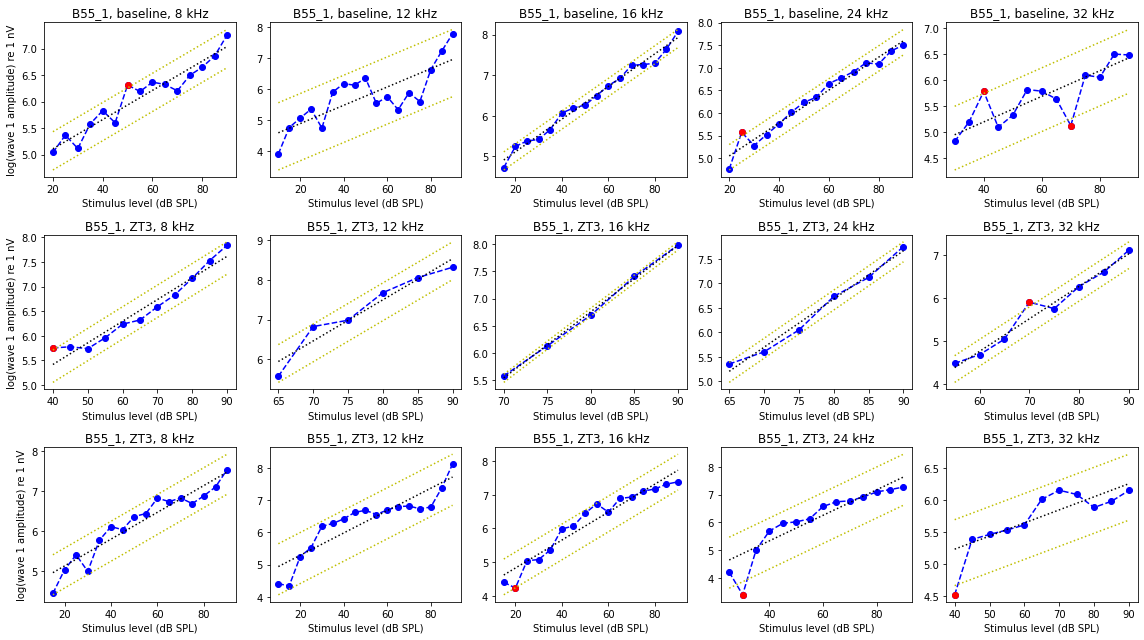

In [5]:
small_df = df_abr.query("id=='B55_1'")
abr_io(small_df)

## Threshold
Thresholds can be shown for any combination of data points, but would make most sense when limited to a single substrain, single noise level, and single time of abr recording.

Different times of ABR recording have different colors. High saturation lines indicate the means + standard error of respective groups. Lines with lower saturation correspond to thresholds of single subjects.

After plotting, results of a statistical analysis are also shown. First, a Kruskal-Wallis test checks for differences between groups. If a difference is significant (alpha<0.05), a post hoc Mann-Whitney U test checks which stimulus frequency are significantly different (alpha<0.05).

*The query for noise_spl can be changed to 100, 103, or 105. The abr_time can be either ['baseline', '2w'] or ['baseline', '24h']*

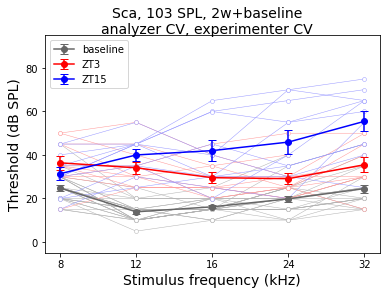

alpha = 0.05

Frequency: 8.0 kHz
  Overall Kruskal-Wallis:
   *Significant difference (p=0.0035)
  Post hoc Mann-Whitney U:
   *Significant effect for groups baseline <--> ZT3 (p=0.0013)
    No significant effect for groups baseline <--> ZT15 (p=0.1000)
    No significant effect for groups ZT3 <--> ZT15 (p=0.1310)
Frequency: 12.0 kHz
  Overall Kruskal-Wallis:
   *Significant difference (p=0.0000)
  Post hoc Mann-Whitney U:
   *Significant effect for groups baseline <--> ZT3 (p=0.0000)
   *Significant effect for groups baseline <--> ZT15 (p=0.0000)
    No significant effect for groups ZT3 <--> ZT15 (p=0.1310)
Frequency: 16.0 kHz
  Overall Kruskal-Wallis:
   *Significant difference (p=0.0000)
  Post hoc Mann-Whitney U:
   *Significant effect for groups baseline <--> ZT3 (p=0.0000)
   *Significant effect for groups baseline <--> ZT15 (p=0.0000)
    No significant effect for groups ZT3 <--> ZT15 (p=0.0528)
Frequency: 24.0 kHz
  Overall Kruskal-Wallis:
   *Significant difference (p=0.0000)


In [6]:
small_df = df_abr.query("noise_spl==103 & abr_time in ['baseline', '2w']")
abr_threshold(small_df, ylim=[-5, 95])

## Wave 1 amplitude
Below is an example of wave 1 amplitude plotted against stimulus level and of the result of statistical tests that compare different treatment groups.
1. Each row of panels corresponds to a different stimulus frequency.
2. The left column
    - shows raw ABR data (dots)
    - a fitted linear mixed effects model (solid lines) of the form
    
            log(W1amp) ~ Level_dB * NoiseType
    
    - significant differences (alpha=0.01) between the groups (markers at the top of the panels) according to the model.
    
    The legend indicates which group belongs to what color, and which comparison belongs to what marker type.
3. The right column shows probability plots. The linear mized effects model assumes that the model residuals are homoskedastic. If that is the case, the residuals (blue markers) will follow the red line. These plots assist in visual evaluation of this assumption, and their interpretation is supported by the result of Levene's test. Neither method alone is fool proof, and residuals need to be reasonably homoskedastic.

*The query for noise_spl can be changed to 100, 103, or 105. The abr_time can be either ['baseline', '2w'] or ['baseline', '24h']*

*The stim_levels specify the minimum and maximum stimulus that the function should consider*

*The xlim and ylim parameters specify axis limits.*

*The lme_stim_levels limits the stimulus levels to consider for fitting of the LME. The model cannot handle single values for a given sound level, leading to an error message. Try reducing the (lower) limit when this happens for a selected data set.*

Running LME for 8000 kHz
  Residuals could be heteroskedastic (Levene's test, p=0.0115).

Running LME for 12000 kHz
  Residuals could be heteroskedastic (Levene's test, p=0.0041).

Running LME for 16000 kHz
  Residuals could be heteroskedastic (Levene's test, p=0.0000).

Running LME for 24000 kHz
  Residuals are homoskedastic.

Running LME for 32000 kHz
  Residuals could be heteroskedastic (Levene's test, p=0.0000).



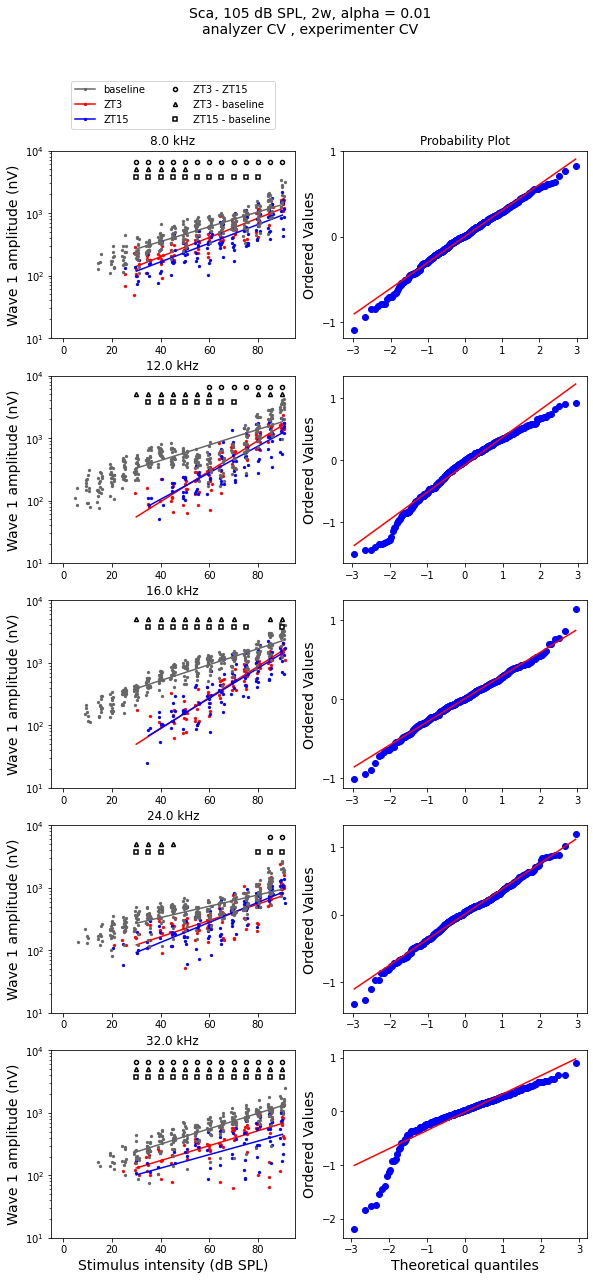

In [7]:
small_df = df_abr.query("noise_spl==105 & abr_time in ['baseline', '2w']")
wave1_amplitude(small_df, stim_levels=[0, 90], xlim=[-5, 95], ylim=[1e1, 1e4], lme_stim_levels=[30, 90])

# DP

## Load data
First set the data directory and import an example dataset. In this case it is the JRj dataset, but it could also be the CaJ or Sca dataset.

In [8]:
data_file_path_dp = os.path.join(os.getcwd(), "data", "preprocessed", "DP_JRj_prep.csv")
df_dp = pd.read_csv(data_file_path_dp)

*Changing "DP_Sca_prep.csv" to "DP_CaJ_prep.csv" or "DP_JRj_prep.csv" loads data for a different substrain.*

Our data looks like the following:

In [9]:
df_dp.sample(7)

,file_number,substrain,noise_spl,noise_type,abr_time,id,experimenter_id,freq_hz,level_db,f1,f2,level_f1,level_f2,level_distprod,is_outlier
10489,717,JRj,103,ZT15,2w,x215333_4,CV,32000.0,70.0,26656.0,32000.0,49.920601,55.239250,-7.322853,False
6713,517,JRj,103,baseline,baseline,x215343_4,CV,24000.0,35.0,19992.0,24000.0,23.917252,13.672348,-15.440079,False
3907,9,JRj,105,baseline,baseline,I-1655_2,RP,8000.0,35.0,6664.0,8000.0,31.235874,22.754246,-15.222656,False
2957,345,JRj,100,ZT15,2w,C46068_2,JF,12000.0,40.0,9996.0,12000.0,28.934578,29.463722,-26.464180,False
5785,214,JRj,105,ZT15,2w,I-1657_12,RP,8000.0,60.0,6664.0,8000.0,55.408337,46.445660,-19.439827,False
7070,523,JRj,103,baseline,baseline,x215344_5,CV,32000.0,70.0,26656.0,32000.0,44.617195,56.999430,-8.119637,True
10456,715,JRj,103,ZT15,2w,x215333_4,CV,16000.0,40.0,13328.0,16000.0,32.296494,36.514687,-13.214561,False


## Threshold
Thresholds can be shown for any combination of data points, but would make most sense when limited to a single substrain, single noise level, and single time of abr recording.

Different times of DP recording have different colors. High saturation lines indicate the means + standard error of respective groups. Lines with lower saturation correspond to thresholds of single subjects.

After plotting, results of a statistical analysis are also shown. First, a Kruskal-Wallis test checks for differences between groups. If a difference is significant (alpha<0.05), a post hoc Mann-Whitney U test checks which stimulus frequency are significantly different (alpha<0.05).

*The query for noise_spl can be changed to 100, 103, or 105. The abr_time can be either ['baseline', '2w'] or ['baseline', '24h']*

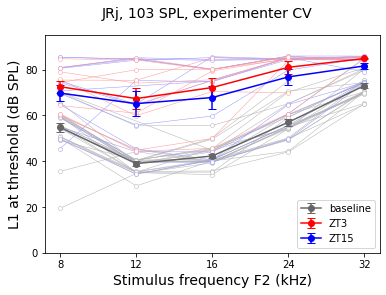

alpha = 0.05

Frequency: 8.0 kHz
  Overall Kruskal-Wallis:
   *Significant difference (p=0.0001)
  Post hoc Mann-Whitney U:
   *Significant effect for groups baseline <--> ZT15 (p=0.0030)
   *Significant effect for groups baseline <--> ZT3 (p=0.0001)
    No significant effect for groups ZT15 <--> ZT3 (p=0.7474)
Frequency: 12.0 kHz
  Overall Kruskal-Wallis:
   *Significant difference (p=0.0000)
  Post hoc Mann-Whitney U:
   *Significant effect for groups baseline <--> ZT15 (p=0.0002)
   *Significant effect for groups baseline <--> ZT3 (p=0.0000)
    No significant effect for groups ZT15 <--> ZT3 (p=0.9753)
Frequency: 16.0 kHz
  Overall Kruskal-Wallis:
   *Significant difference (p=0.0000)
  Post hoc Mann-Whitney U:
   *Significant effect for groups baseline <--> ZT15 (p=0.0005)
   *Significant effect for groups baseline <--> ZT3 (p=0.0000)
    No significant effect for groups ZT15 <--> ZT3 (p=0.7474)
Frequency: 24.0 kHz
  Overall Kruskal-Wallis:
   *Significant difference (p=0.0000)
  P

In [10]:
small_df = df_dp.query("noise_spl==103 & abr_time in ['baseline', '2w']")
dp_threshold(small_df, ylim=[0, 95])

# Ribbon and synapse-pairing

## Load data

*Either "ribbons.csv" or "synapses.csv" can be loaded below.*

In [11]:
data_file_path_counts = os.path.join(os.getcwd(), "data", "raw", "synapses.csv")
df_counts = pd.read_csv(data_file_path_counts)

Our data looks like the following.

In [12]:
df_counts.sample(4)

,id,freq_hz,counts,substrain,noise_spl,abr_time
106,C40,48000.0,4.4,CaJ,100,ZT3
493,C46067,8000.0,7.8,JRj,100,ZT15
254,I-1655_6,6000.0,8.0,JRj,105,ZT3
271,I-1655_8,8000.0,4.4,JRj,105,ZT3


Ribbon counts and synapse pairings can be visualized using the following call.

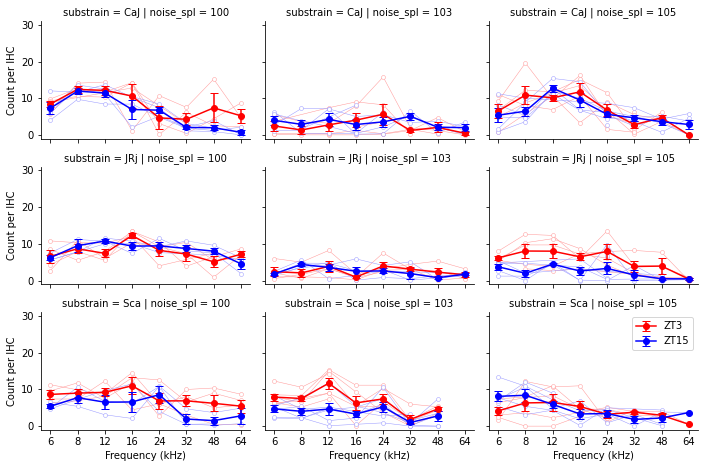

In [13]:
histology_counts(df_counts)